# Andmeteadus energeetikas Report I

Kristian Kirs - 242046MASM

Ella Maria Raud - 242407MASM

Kasutatud andmed: solar_242046.csv

#### Task 2: Data collection
##### Get the data


In [107]:
#Vajaminevad teegid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pvt = Photovoltaic Tallinn, laeme faili sisse
pvt = pd.read_csv('solar_242046.csv')

# Kontrollime, et kas ikka laeb
display(pvt.head())

# Uurime palju andmeid on ja palju võiks puuda
print("\nData Types and Missing Values:")
display(pvt.info())

# Esialgne statistika
print("\nSummary Statistics:")
display(pvt.describe())



,timestamp,raw,temperature,modified1,modified2,modified3
0,1612224000000,0.0,-3.9,NaN,0.0,0.0
1,1612227600000,0.0,-3.5,NaN,0.0,0.0
2,1612231200000,0.0,-3.0,0.0,0.0,0.0
3,1612234800000,0.0,-2.6,NaN,0.0,0.0
4,1612238400000,0.0,-2.4,0.0,0.0,0.0



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    17016 non-null  int64  
 1   raw          17016 non-null  float64
 2   temperature  17016 non-null  float64
 3   modified1    15825 non-null  float64
 4   modified2    15641 non-null  float64
 5   modified3    15879 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 797.8 KB


None


Summary Statistics:


,timestamp,raw,temperature,modified1,modified2,modified3
count,1.701600e+04,17016.000000,17016.000000,15825.000000,15641.000000,15879.000000
mean,1.643547e+12,36912.094888,6.609191,36709.231537,25506.277558,33958.829309
std,1.797037e+10,66907.410347,9.292033,66735.753013,50828.415005,65118.934709
min,1.612224e+12,0.000000,-24.500000,0.000000,0.000000,0.000000
25%,1.628056e+12,0.000000,-0.200000,0.000000,0.000000,0.000000
50%,1.643715e+12,0.000000,6.400000,0.000000,0.000000,0.000000
75%,1.659028e+12,38258.015000,13.400000,37596.490000,22090.490000,30661.975000
max,1.675292e+12,301630.010000,30.100000,301630.010000,266069.210000,301630.010000


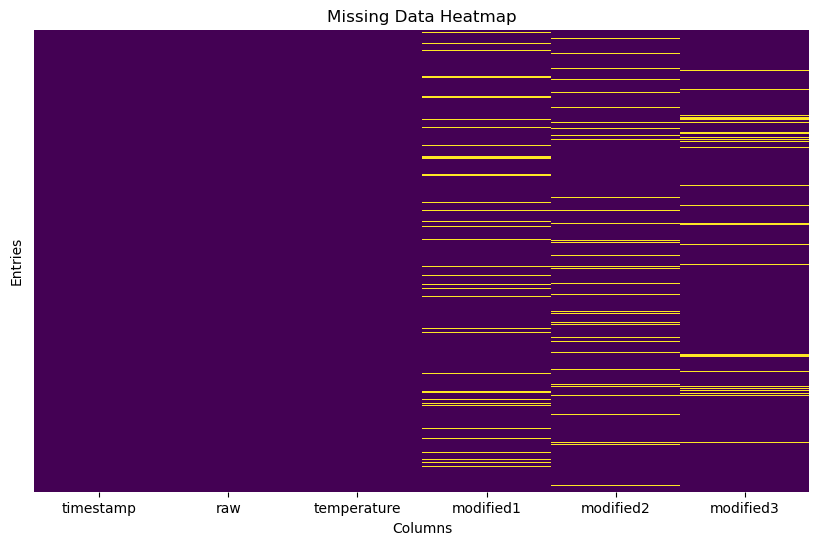

In [108]:
# Uurime kus andmed puuduvad heatmapiga
plt.figure(figsize=(10, 6))
sns.heatmap(pvt.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Entries")
plt.show()


In [141]:
from zoneinfo import ZoneInfo

# UNIX ajatempel UTC-ajaks
pvt['utc_date'] = pd.to_datetime(pvt['timestamp'], unit='ms', utc=True)

# UTC-aja konverteerimine Eesti ajaks, arvestades sh kellakeeramist
pvt['local_time'] = pvt['utc_date'].dt.tz_convert(ZoneInfo('Europe/Tallinn'))

# Aasta, kuu, päev, tund, minut formaat (YYYY.MM.DD HH:MM) paremaks jälgimiseks
pvt['formatted_local_date'] = pvt['local_time'].dt.strftime('%Y.%m.%d %H:%M')

pvt.head()

,timestamp,raw,temperature,modified1,modified2,modified3,utc_date,formatted_local_date,date,hour,day_of_week,modified1_listwise_deleted,modified1_mean_imputed,month,season,modified1_seasonal_mean_imputed,modified1_monthly_hourly_mean_imputed,modified1_knn_imputed,local_time
local_time,,,,,,,,,,,,,,,,,,,
2021-02-02 02:00:00+02:00,1612224000000,0.0,-3.9,NaN,0.0,0.0,2021-02-02 00:00:00+00:00,2021.02.02 02:00,2021-02-02,2,1,Deleted,36709.231537,2,Winter,4734.380416,0.0,0.0,2021-02-02 02:00:00+02:00
2021-02-02 03:00:00+02:00,1612227600000,0.0,-3.5,NaN,0.0,0.0,2021-02-02 01:00:00+00:00,2021.02.02 03:00,2021-02-02,3,1,Deleted,36709.231537,2,Winter,4734.380416,0.0,0.0,2021-02-02 03:00:00+02:00
2021-02-02 04:00:00+02:00,1612231200000,0.0,-3.0,0.0,0.0,0.0,2021-02-02 02:00:00+00:00,2021.02.02 04:00,2021-02-02,4,1,0.0,0.000000,2,Winter,0.000000,0.0,0.0,2021-02-02 04:00:00+02:00
2021-02-02 05:00:00+02:00,1612234800000,0.0,-2.6,NaN,0.0,0.0,2021-02-02 03:00:00+00:00,2021.02.02 05:00,2021-02-02,5,1,Deleted,36709.231537,2,Winter,4734.380416,0.0,0.0,2021-02-02 05:00:00+02:00
2021-02-02 06:00:00+02:00,1612238400000,0.0,-2.4,0.0,0.0,0.0,2021-02-02 04:00:00+00:00,2021.02.02 06:00,2021-02-02,6,1,0.0,0.000000,2,Winter,0.000000,0.0,0.0,2021-02-02 06:00:00+02:00


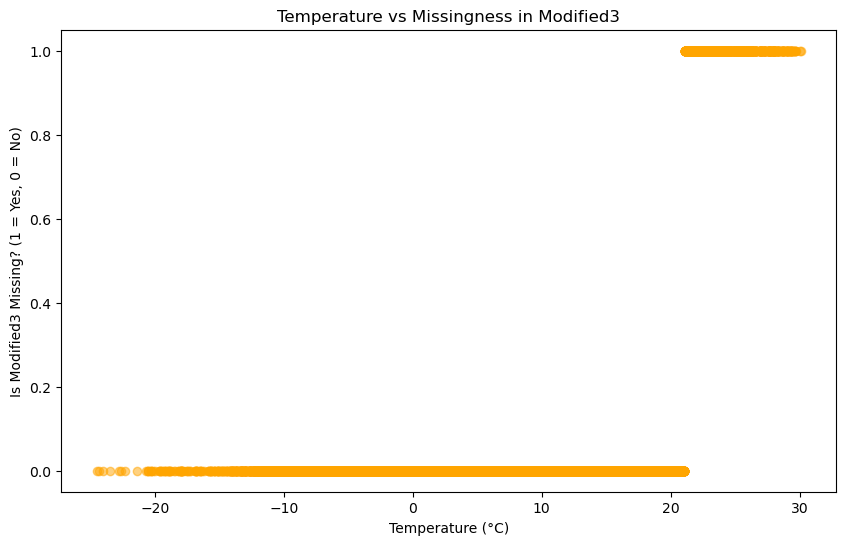

In [113]:
# Otsime suhet temperatuuri ja andmete puudumise vahel modified3 veerul esialgu
plt.figure(figsize=(10, 6))
plt.scatter(pvt['temperature'], pvt['modified3'].isnull(), alpha=0.5, color='orange')
plt.title("Temperature vs Missingness in Modified3")
plt.xlabel("Temperature (°C)")
plt.ylabel("Is Modified3 Missing? (1 = Yes, 0 = No)")
plt.show()


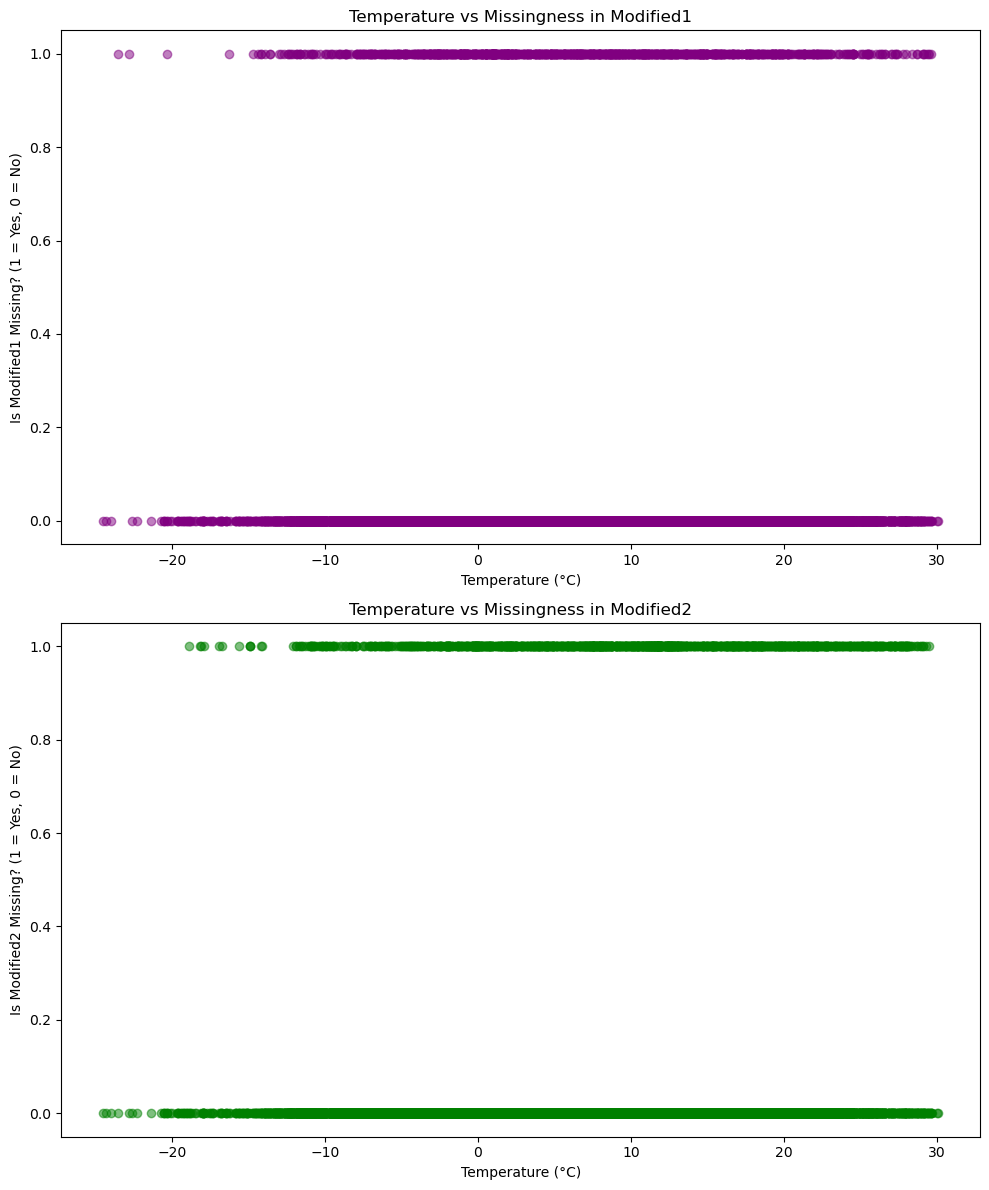

In [114]:
# Sama asi modified1 ja modified2 kohta
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# modified1
axs[0].scatter(pvt['temperature'], pvt['modified1'].isnull(), alpha=0.5, color='purple')
axs[0].set_title('Temperature vs Missingness in Modified1')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Is Modified1 Missing? (1 = Yes, 0 = No)')

# modified2
axs[1].scatter(pvt['temperature'], pvt['modified2'].isnull(), alpha=0.5, color='green')
axs[1].set_title('Temperature vs Missingness in Modified2')
axs[1].set_xlabel('Temperature (°C)')
axs[1].set_ylabel('Is Modified2 Missing? (1 = Yes, 0 = No)')

plt.tight_layout()
plt.show()


Kõrgeim temperatuur olemasolevate andmetega modified3: 21.0°C
Madalaim temperatuur andmeteta modified3: 21.1°C


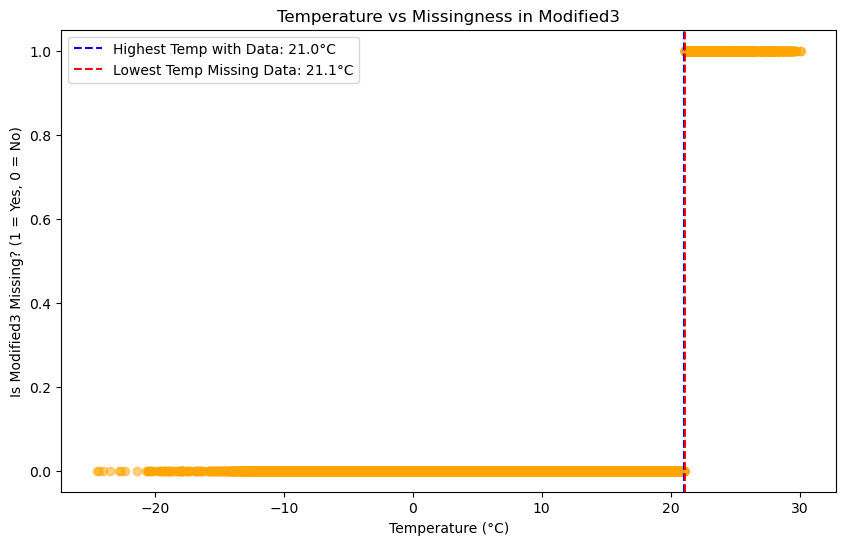

In [117]:
# Modified3 näitas ilmselgelt mingit suhet temperatuuri ja andmepuudumise vahel. Uurime välja kust jookseb piir
#Otsime kõrgeimat tempi andmetega
max_temp_with_data = pvt[pvt['modified3'].notnull()]['temperature'].max()
print(f"Kõrgeim temperatuur olemasolevate andmetega modified3: {max_temp_with_data}°C")

# Nüüd madalaim temp kus andmeid ei ole
min_temp_missing_data = pvt[pvt['modified3'].isnull()]['temperature'].min()
print(f"Madalaim temperatuur andmeteta modified3: {min_temp_missing_data}°C")

# Joon scatterplotile paremaks jälgimiseks
plt.figure(figsize=(10, 6))
plt.scatter(pvt['temperature'], pvt['modified3'].isnull(), alpha=0.5, color='orange')
plt.axvline(x=max_temp_with_data, color='blue', linestyle='--', label=f'Highest Temp with Data: {max_temp_with_data}°C')
plt.axvline(x=min_temp_missing_data, color='red', linestyle='--', label=f'Lowest Temp Missing Data: {min_temp_missing_data}°C')
plt.title("Temperature vs Missingness in Modified3")
plt.xlabel("Temperature (°C)")
plt.ylabel("Is Modified3 Missing? (1 = Yes, 0 = No)")
plt.legend()
plt.show()


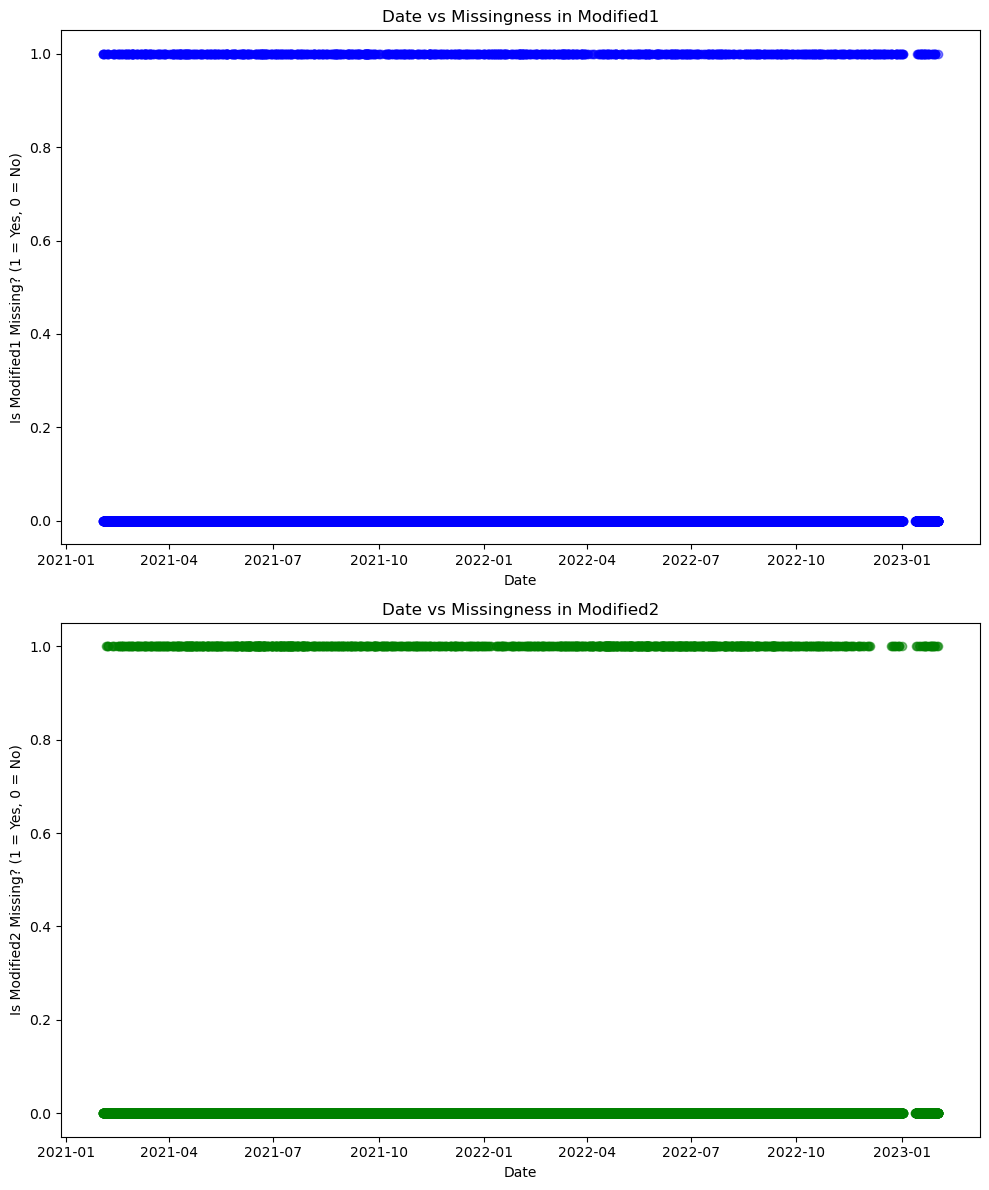

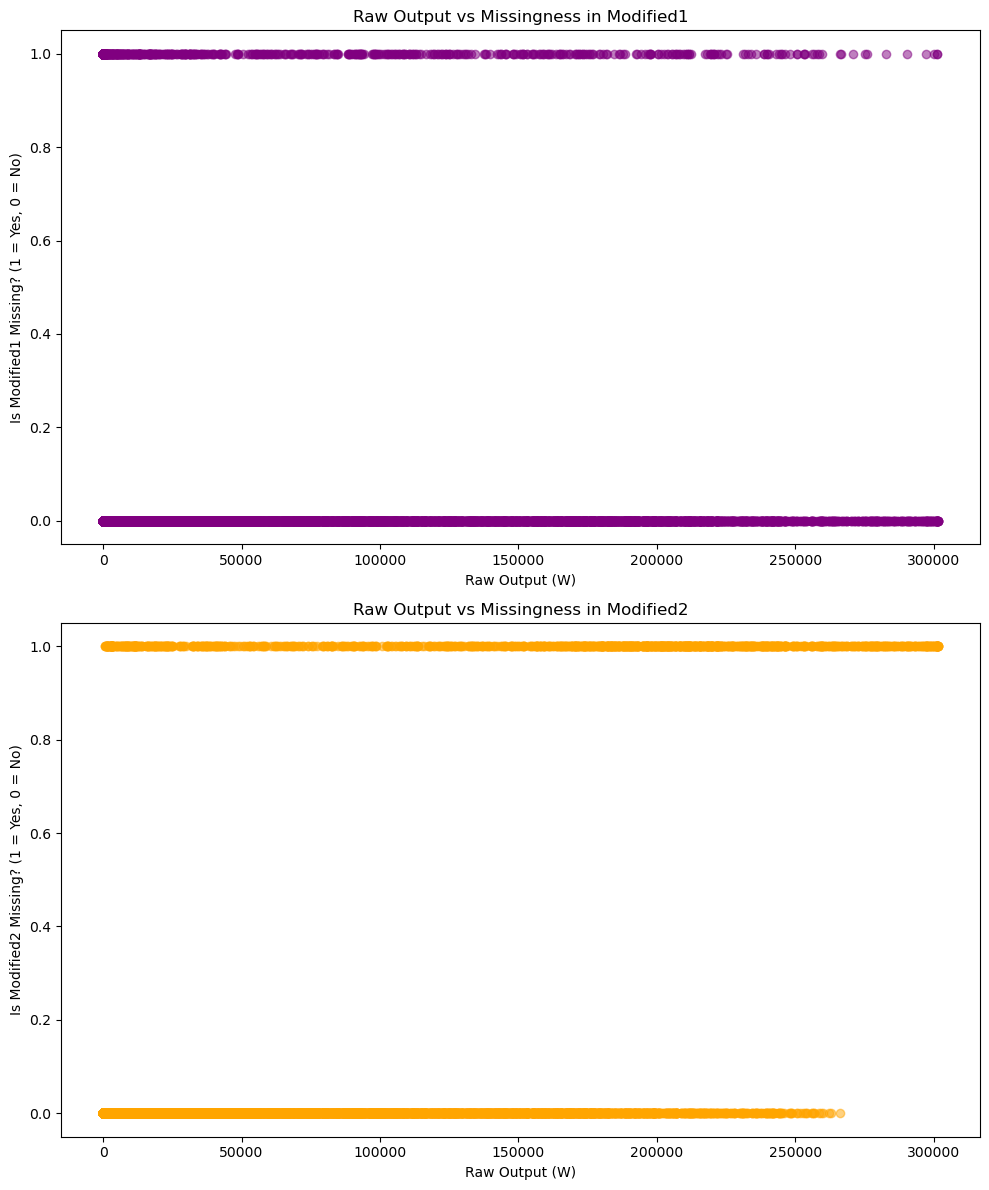

In [122]:
# Otsime suhet aja ja modified1/2 vahel
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Modified1
axs[0].scatter(pvt['local_time'], pvt['modified1'].isnull(), alpha=0.5, color='blue')
axs[0].set_title('Date vs Missingness in Modified1')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Is Modified1 Missing? (1 = Yes, 0 = No)')

# modified2
axs[1].scatter(pvt['local_time'], pvt['modified2'].isnull(), alpha=0.5, color='green')
axs[1].set_title('Date vs Missingness in Modified2')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Is Modified2 Missing? (1 = Yes, 0 = No)')

plt.tight_layout()
plt.show()

# Proovime sama asja nüüd toorandmete "raw" ja modified1/2
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# modified1
axs[0].scatter(pvt['raw'], pvt['modified1'].isnull(), alpha=0.5, color='purple')
axs[0].set_title('Raw Output vs Missingness in Modified1')
axs[0].set_xlabel('Raw Output (W)')
axs[0].set_ylabel('Is Modified1 Missing? (1 = Yes, 0 = No)')

# modified2
axs[1].scatter(pvt['raw'], pvt['modified2'].isnull(), alpha=0.5, color='orange')
axs[1].set_title('Raw Output vs Missingness in Modified2')
axs[1].set_xlabel('Raw Output (W)')
axs[1].set_ylabel('Is Modified2 Missing? (1 = Yes, 0 = No)')

plt.tight_layout()
plt.show()


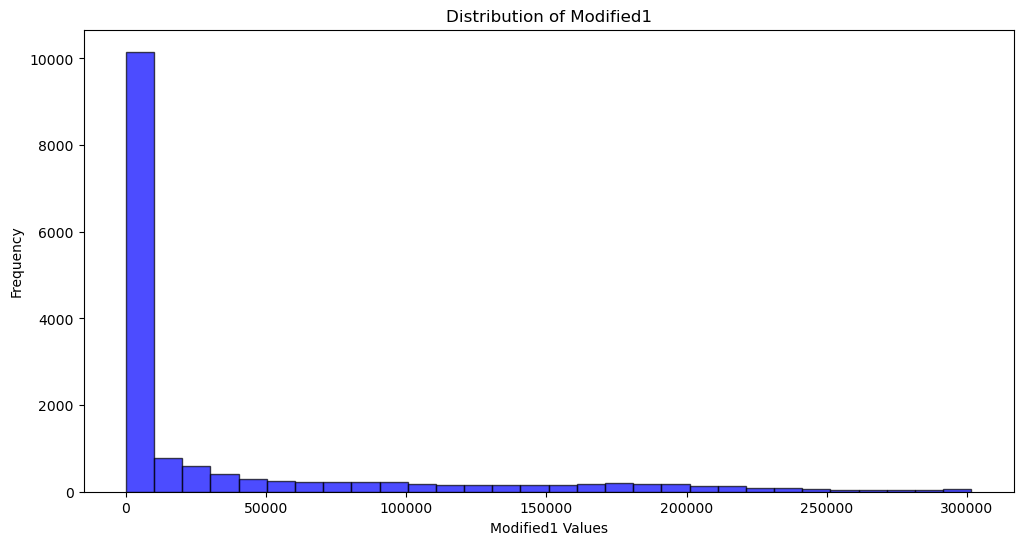

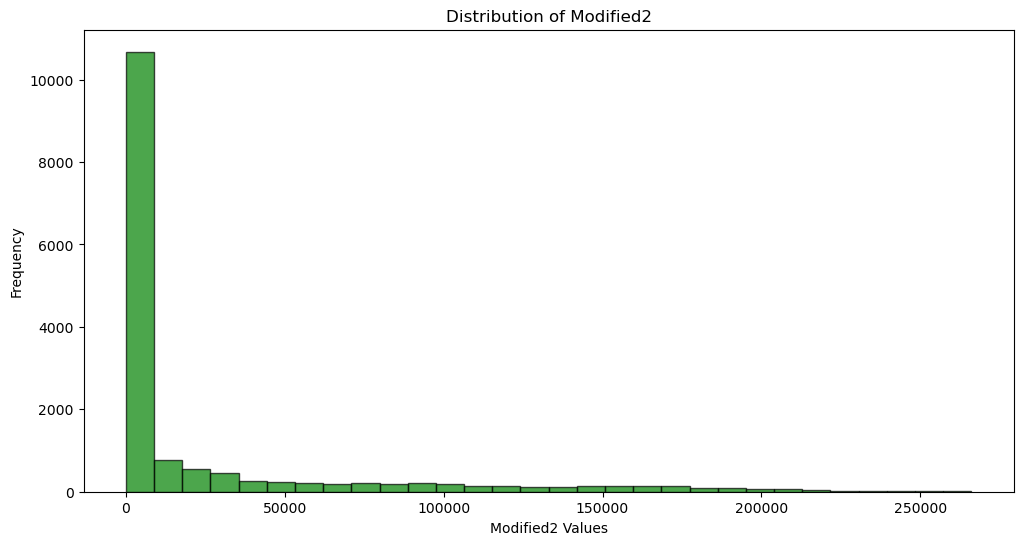

In [123]:
#Teeme histogramme modified1/2, et tuvastada esinenevate andmete sagedust. Äkki on olemas vahemik mis selgelt puudub
# modified1
plt.figure(figsize=(12, 6))
plt.hist(pvt['modified1'].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Modified1')
plt.xlabel('Modified1 Values')
plt.ylabel('Frequency')
plt.show()

# modified2
plt.figure(figsize=(12, 6))
plt.hist(pvt['modified2'].dropna(), bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Modified2')
plt.xlabel('Modified2 Values')
plt.ylabel('Frequency')
plt.show()


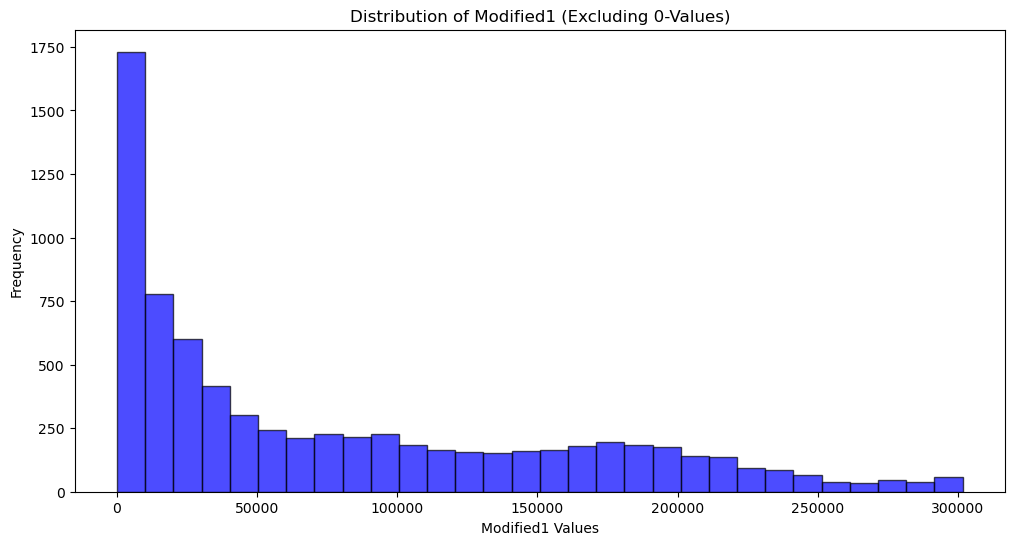

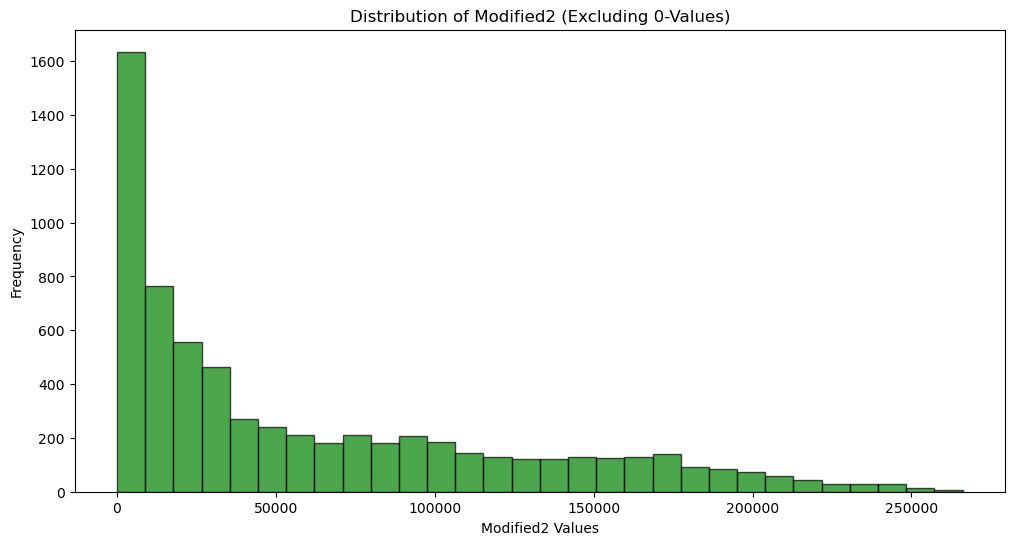

In [124]:
# Nullid alguses tekitavad liiga palju kalduvust. Võtame null-väärtused välja
# modified1
plt.figure(figsize=(12, 6))
plt.hist(pvt['modified1'][pvt['modified1'] > 0].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Modified1 (Excluding 0-Values)')
plt.xlabel('Modified1 Values')
plt.ylabel('Frequency')
plt.show()

# modified2
plt.figure(figsize=(12, 6))
plt.hist(pvt['modified2'][pvt['modified2'] > 0].dropna(), bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Modified2 (Excluding 0-Values)')
plt.xlabel('Modified2 Values')
plt.ylabel('Frequency')
plt.show()


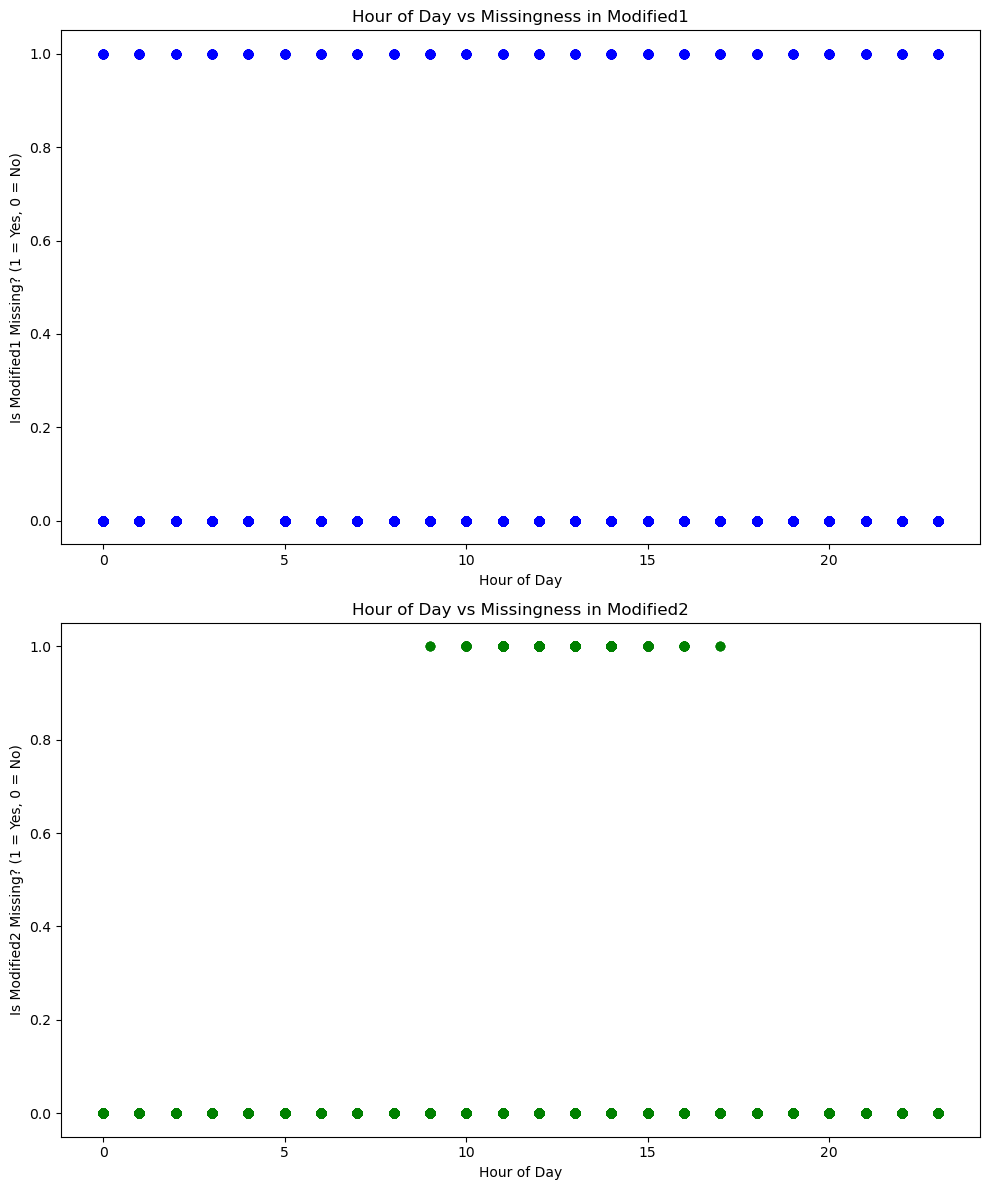

In [125]:
# Uurime nüüd, kas andmed puuduvad vastavalt kellaajale
# Võtame kohalikust ajast välja kõik peale tunni
pvt['hour'] = pvt['local_time'].dt.hour

# Graafikud modified1 ja 2, et tuvastada kas teatud tundidel andmed puuduvad või mitte
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# modified1
axs[0].scatter(pvt['hour'], pvt['modified1'].isnull(), alpha=0.5, color='blue')
axs[0].set_title('Hour of Day vs Missingness in Modified1')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('Is Modified1 Missing? (1 = Yes, 0 = No)')

# modified2
axs[1].scatter(pvt['hour'], pvt['modified2'].isnull(), alpha=0.5, color='green')
axs[1].set_title('Hour of Day vs Missingness in Modified2')
axs[1].set_xlabel('Hour of Day')
axs[1].set_ylabel('Is Modified2 Missing? (1 = Yes, 0 = No)')

plt.tight_layout()
plt.show()


In [128]:
# Modified2 leidsime huvitava seose, et andmed puuduvad ainult kellaaegadel 9 - 17, kuid mitte kõik
# Uurime kui suur hulk andmetes sellel kellaajal kokku puudub
missing_9_to_17 = pvt[(pvt['hour'] >= 9) & (pvt['hour'] <= 17)]['modified2'].isnull().mean()
print(f"Kella 9 ja 17 vahel puudub {missing_9_to_17:.2%} andmeid")

# Uurime kas leidub andmeid mis on ikka väljaspool seda 9 - 17 vahemikku
missing_outside_9_to_17 = pvt[(pvt['hour'] < 9) | (pvt['hour'] > 17)]['modified2'].isnull().mean()
print(f"Väljaspool 9 - 17 vahemikku puudub {missing_outside_9_to_17:.2%} andmeid")


Kella 9 ja 17 vahel puudub 21.55% andmeid
Väljaspool 9 - 17 vahemikku puudub 0.00% andmeid


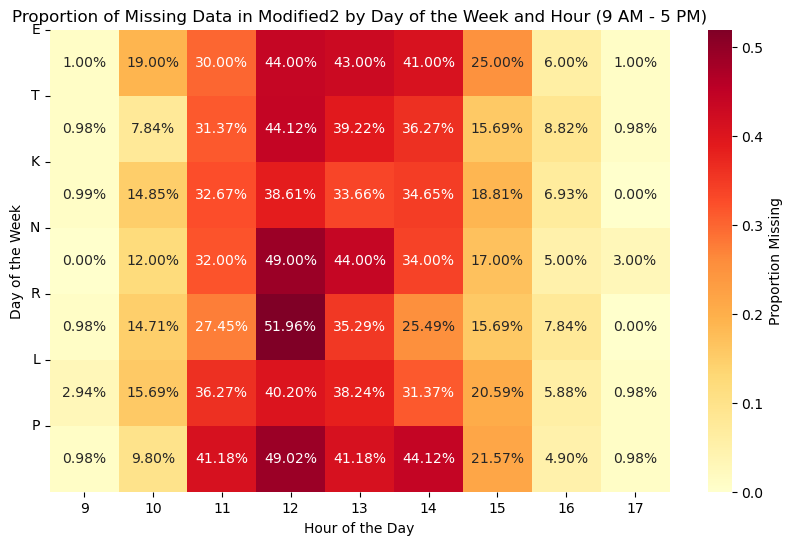

In [129]:
# Teeme heatmapi nädala andmete kohta, et arusaada, kuidas puuduolevad andmed paiknevad 9 - 17 vahemikus
pvt['day_of_week'] = pvt['local_time'].dt.dayofweek  # 0 = Esmaspäev, 6 = Pühapäev
hourly_missing_data = pvt[(pvt['hour'] >= 9) & (pvt['hour'] <= 17)]

# Arvutame puuduolevate andmete osakaalu igas tunnis, igal nädalapäeval
missing_by_day_hour = hourly_missing_data.groupby(['day_of_week', 'hour'])['modified2'].apply(lambda x: x.isnull().mean()).unstack()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_by_day_hour, cmap="YlOrRd", annot=True, fmt=".2%", cbar_kws={'label': 'Proportion Missing'})
plt.title("Proportion of Missing Data in Modified2 by Day of the Week and Hour (9 AM - 5 PM)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.yticks(ticks=range(7), labels=['E', 'T', 'K', 'N', 'R', 'L', 'P'], rotation=0)
plt.show()


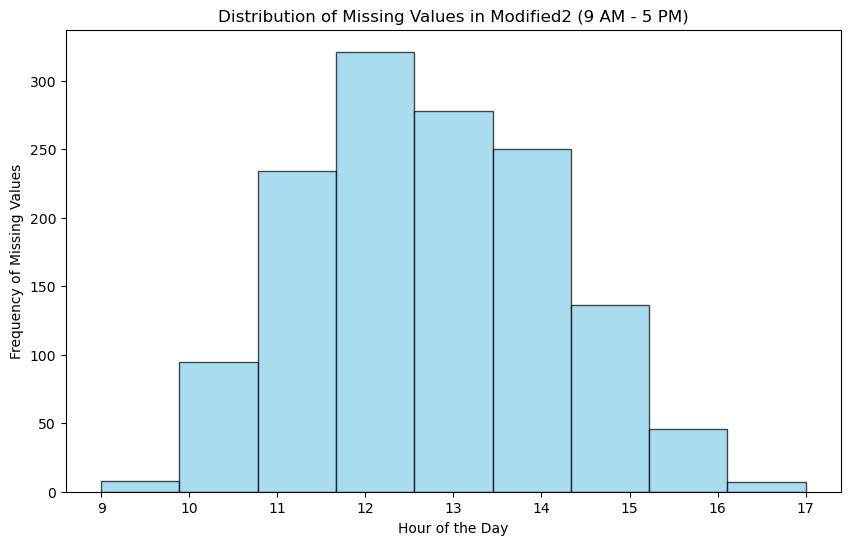

In [130]:
# Filter the data for 9 AM to 5 PM and select only the missing values in modified2
missing_9_to_17_data = pvt[(pvt['hour'] >= 9) & (pvt['hour'] <= 17) & (pvt['modified2'].isnull())]

# Teeb histogrami puuduvate andmete sageduse kohta, võibolla leidub normaaljaotus
plt.figure(figsize=(10, 6))
plt.hist(missing_9_to_17_data['hour'], bins=9, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Missing Values in Modified2 (9 AM - 5 PM)')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Missing Values')
plt.show()


In [19]:
from scipy.stats import anderson

# Anderson-Darlingu test normaalsuse tuvastamiseks ajavahemikus 9 - 17
result = anderson(missing_9_to_17_data['hour'], dist='norm')
print('Statistic:', result.statistic)
for i in range(len(result.critical_values)):
    print(f'Critical value for significance level {result.significance_level[i]}: {result.critical_values[i]}')


Statistic: 24.7756357546682
Critical value for significance level 15.0: 0.574
Critical value for significance level 10.0: 0.654
Critical value for significance level 5.0: 0.785
Critical value for significance level 2.5: 0.915
Critical value for significance level 1.0: 1.089


Testi statistika: Andersoni-Darlingi test loob statistika, mis mõõdab kõrvalekallet normaaljaotusest. Antud juhul on testi statistika 24,7756.

Kriitilised väärtused: kriitilised väärtused vastavad erinevatele olulisuse tasemetele (15%, 10%, 5%, 2,5% ja 1%). Kui testistatistika ületab antud olulisuse tasemel kriitilist väärtust, lükkame tagasi hüpoteesi, et andmed järgivad sellel tasemel normaaljaotust.

Võrdlus:

 Siin on testi statistika (24,7756) palju suurem kui kõik kriitilised väärtused, sealhulgas kõrgeim (1,089 1% olulisuse tasemel).
 See tähendab, et võime ümber lükata hüpoteesi, et andmed järgivad normaalset jaotust mis tahes tavapärasel olulisuse tasemel (isegi 1% tasemel).
 
 ##### oleme jäänud järeldusele, et modified2 on MAR

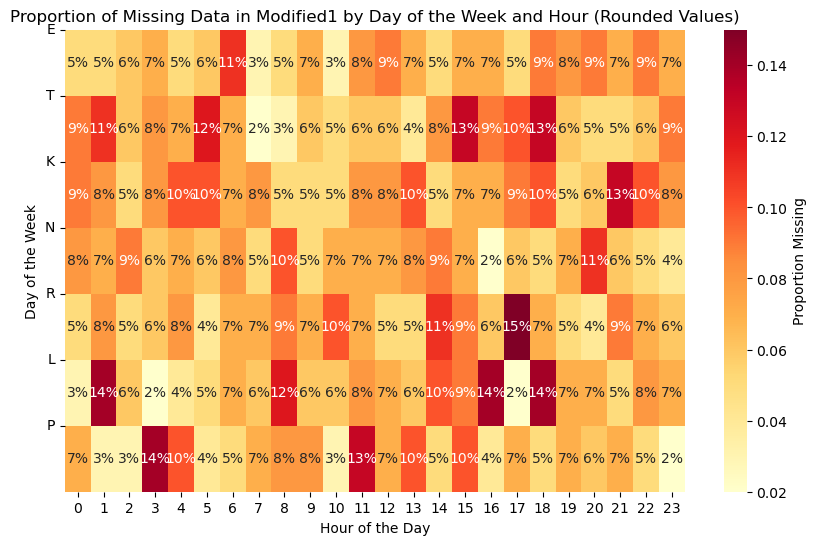

In [131]:
# Heatmap modified1 veerule
plt.figure(figsize=(10, 6))
sns.heatmap(missing_by_day_hour_mod1.round(2), cmap="YlOrRd", annot=True, fmt=".0%", cbar_kws={'label': 'Proportion Missing'})
plt.title("Proportion of Missing Data in Modified1 by Day of the Week and Hour (Rounded Values)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.yticks(ticks=range(7), labels=['E', 'T', 'K', 'N', 'R', 'L', 'P'], rotation=0)
plt.show()


In [133]:
from scipy.stats import ttest_ind

# T-test, et tuvastada modified1-s MCAR (pigem jõuda järeldusele lähemale) kui pvalue on >0.05 siis viitab MCAR-ile
# Jaotame modified1 kahte gruppi: puuduvad ja mittepuuduvad
missing_group = pvt[pvt['modified1'].isnull()]
non_missing_group = pvt[pvt['modified1'].notnull()]

# T-test temperatuuri suhtes
temp_ttest = ttest_ind(missing_group['temperature'], non_missing_group['temperature'], nan_policy='omit')
print("Temperature T-Test Results:", temp_ttest)

# T-test toorandmete suhtes
raw_ttest = ttest_ind(missing_group['raw'], non_missing_group['raw'], nan_policy='omit')
print("Raw Output T-Test Results:", raw_ttest)


Temperature T-Test Results: Ttest_indResult(statistic=1.7558165684554567, pvalue=0.07913772642142057)
Raw Output T-Test Results: Ttest_indResult(statistic=1.4417430113969887, pvalue=0.14939329039183133)


In [134]:
# Huvi pärast uurin t-testi modified2, et kas ta annab MAR-ile omaseid andmed, mis on alla <0.05
# Jaotame modified2 kahte gruppi
missing_group_mod2 = pvt[pvt['modified2'].isnull()]
non_missing_group_mod2 = pvt[pvt['modified2'].notnull()]

# T-test temperatuuri suhtes modified2
temp_ttest_mod2 = ttest_ind(missing_group_mod2['temperature'], non_missing_group_mod2['temperature'], nan_policy='omit')
print("Temperature T-Test Results for Modified2:", temp_ttest_mod2)

# T-test toorandmete suhtes modified2
raw_ttest_mod2 = ttest_ind(missing_group_mod2['raw'], non_missing_group_mod2['raw'], nan_policy='omit')
print("Raw Output T-Test Results for Modified2:", raw_ttest_mod2)


Temperature T-Test Results for Modified2: Ttest_indResult(statistic=15.24245980830791, pvalue=4.082732159786211e-52)
Raw Output T-Test Results for Modified2: Ttest_indResult(statistic=91.66498560559954, pvalue=0.0)


In [136]:
# 3b ii

from sklearn.impute import KNNImputer

# 1. Ridade kaupa kustutamine, kus kustatud read on märgitud "Deleted" tähistusega
pvt['modified1_listwise_deleted'] = pvt['modified1'].apply(lambda x: "Deleted" if pd.isnull(x) else x)

# 2.1 Keskmistamine (Mean) kogu veeru põhjal
mean_value = pvt['modified1'].mean()
pvt['modified1_mean_imputed'] = pvt['modified1'].fillna(mean_value)

# Loome aastaajad hooajalise keskmistamise tarbeks
pvt['month'] = pvt['local_time'].dt.month
pvt['season'] = np.select(
    [
        pvt['month'].isin([12, 1, 2]),  # Winter
        pvt['month'].isin([3, 4, 5]),   # Spring
        pvt['month'].isin([6, 7, 8]),   # Summer
        pvt['month'].isin([9, 10, 11])  # Fall
    ],
    ['Winter', 'Spring', 'Summer', 'Fall']
)

# 2.2 Aastaaja põhine keskmistamine
seasonal_means = pvt.groupby('season')['modified1'].transform('mean')
pvt['modified1_seasonal_mean_imputed'] = pvt['modified1'].fillna(seasonal_means)

# 2.3 Tund-kuu keskmistamine
monthly_hourly_means = pvt.groupby(['month', 'hour'])['modified1'].transform('mean')
pvt['modified1_monthly_hourly_mean_imputed'] = pvt['modified1'].fillna(monthly_hourly_means)

# 3. k-lähimad naabrid (kNN) imputeerimine
knn_imputer = KNNImputer(n_neighbors=5)
pvt['modified1_knn_imputed'] = knn_imputer.fit_transform(pvt[['modified1', 'temperature', 'raw']])[:, 0]

# Kiire ülevaade saadud tulemustest
pvt[['modified1', 'modified1_listwise_deleted', 'modified1_mean_imputed', 
     'modified1_seasonal_mean_imputed', 'modified1_monthly_hourly_mean_imputed', 'modified1_knn_imputed']].head(10)



,modified1,modified1_listwise_deleted,modified1_mean_imputed,modified1_seasonal_mean_imputed,modified1_monthly_hourly_mean_imputed,modified1_knn_imputed
0,NaN,Deleted,36709.231537,4734.380416,0.0,0.0
1,NaN,Deleted,36709.231537,4734.380416,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0
3,NaN,Deleted,36709.231537,4734.380416,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0
5,0.0,0.0,0.000000,0.000000,0.0,0.0
6,0.0,0.0,0.000000,0.000000,0.0,0.0
7,0.0,0.0,0.000000,0.000000,0.0,0.0
8,0.0,0.0,0.000000,0.000000,0.0,0.0
9,0.0,0.0,0.000000,0.000000,0.0,0.0


In [71]:
#Tulemuste mõõdikud

from sklearn.metrics import mean_absolute_error, mean_squared_error
# Siia dictionarysse salvestame saadud tulemused
performance_metrics = {}

# Arvutame iga modified1 järgi imputeeritud veeergu MAE ja RMSE
# Read kus on puudusud tuleb vahelt ära jätta
methods = {
    'Mean Imputation': pvt['modified1_mean_imputed'],
    'Seasonal Mean Imputation': pvt['modified1_seasonal_mean_imputed'],
    'Monthly-Hourly Mean Imputation': pvt['modified1_monthly_hourly_mean_imputed'],
    'kNN Imputation': pvt['modified1_knn_imputed']
}

for method, imputed_data in methods.items():
    # Filter out rows where 'raw' has NaNs
    mask = ~pvt['raw'].isnull()
    raw_values = pvt.loc[mask, 'raw']
    imputed_values = imputed_data[mask]
    
    # Arvutame MAE ja RMSE
    mae = mean_absolute_error(raw_values, imputed_values)
    rmse = np.sqrt(mean_squared_error(raw_values, imputed_values))
    
    # Andmete salvestamine
    performance_metrics[method] = {'MAE': mae, 'RMSE': rmse}

# Tulemuste väljastamine
for method, metrics in performance_metrics.items():
    print(f"{method} - MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}")


Mean Imputation - MAE: 3591.05, RMSE: 18294.96
Seasonal Mean Imputation - MAE: 3196.31, RMSE: 17114.97
Monthly-Hourly Mean Imputation - MAE: 1289.36, RMSE: 9824.87
kNN Imputation - MAE: 0.93, RMSE: 10.01


In [72]:
# Kustutamise meetodile MAE-d ja RMSE-d ei tehta, leiame selle asemel kui suure osa andmetest me välja kustutame
data_loss_percentage = pvt['modified1'].isnull().mean() * 100
print(f"Data Loss from Listwise Deletion: {data_loss_percentage:.2f}%")


Data Loss from Listwise Deletion: 7.00%


In [73]:
# Arvutame standard viga raw ja modified1 andmetele
sem_results = {}

# Valime veerud millele standard viga arvutatakse
columns = {
    'Raw': pvt['raw'],
    'Mean Imputation': pvt['modified1_mean_imputed'],
    'Seasonal Mean Imputation': pvt['modified1_seasonal_mean_imputed'],
    'Monthly-Hourly Mean Imputation': pvt['modified1_monthly_hourly_mean_imputed'],
    'kNN Imputation': pvt['modified1_knn_imputed']
}

for label, data in columns.items():
    # Võtame tühimikud välja
    data = data.dropna()
    # Arvutame SEM
    sem = data.std() / np.sqrt(len(data))
    sem_results[label] = sem

# Väljastame tulemusi
for label, sem in sem_results.items():
    print(f"{label} - SEM: {sem:.2f}")


Raw - SEM: 512.92
Mean Imputation - SEM: 493.37
Seasonal Mean Imputation - SEM: 495.74
Monthly-Hourly Mean Imputation - SEM: 507.88
kNN Imputation - SEM: 512.91


In [137]:
# Arvutame kokkuvõtlikult statistikat raw andmetele (mean, median, standard deviation jm)

# Arvutame raw ja võtame temperatuuri ka
summary_stats = pvt[['raw', 'temperature']].describe().T

# lisaks võtame statistikasse mediaani ja SEM
summary_stats['median'] = pvt[['raw', 'temperature']].median()
summary_stats['SEM'] = pvt[['raw', 'temperature']].sem()

# Väljastame
summary_stats


,count,mean,std,min,25%,50%,75%,max,median,SEM
raw,17016.0,36912.094888,66907.410347,0.0,0.0,0.0,38258.015,301630.01,0.0,512.915097
temperature,17016.0,6.609191,9.292033,-24.5,-0.2,6.4,13.400,30.10,6.4,0.071233


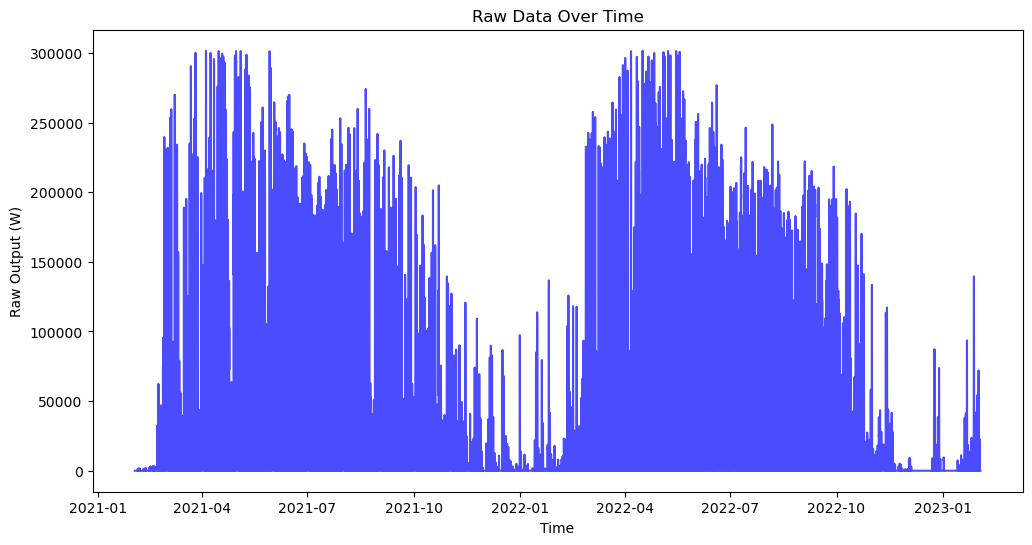

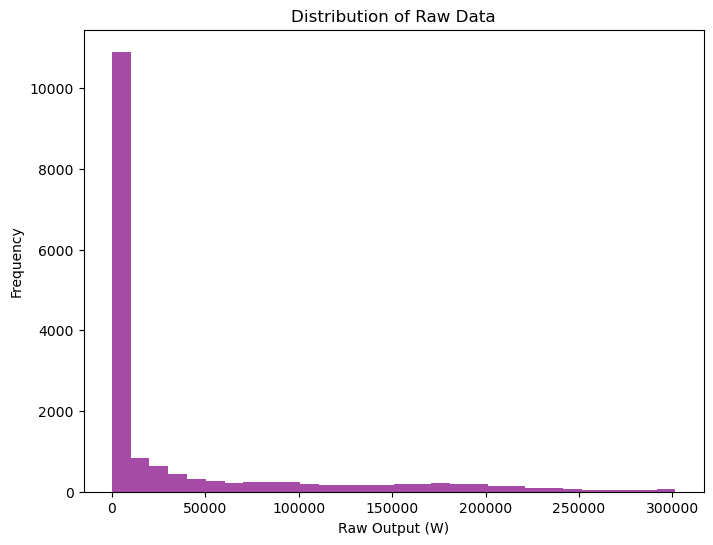

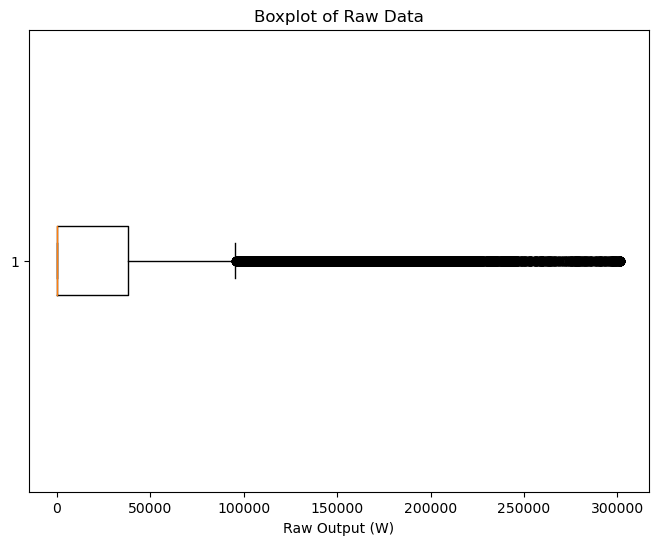

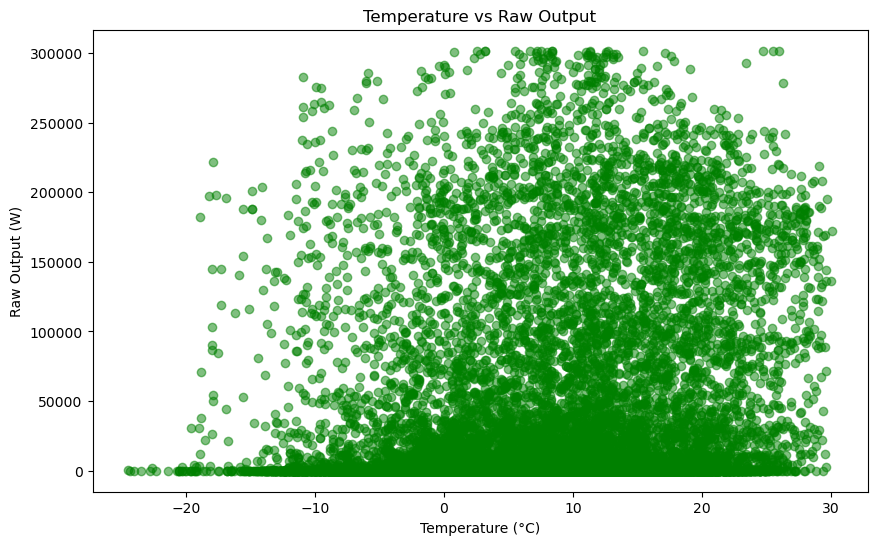

In [80]:
#Mõned plotid veel

# Plot 1: Line plot raw ja aeg
plt.figure(figsize=(12, 6))
plt.plot(pvt['local_time'], pvt['raw'], color='blue', alpha=0.7)
plt.title("Raw Data Over Time")
plt.xlabel("Time")
plt.ylabel("Raw Output (W)")
plt.show()

# Plot 2: Histogram raw andmetest
plt.figure(figsize=(8, 6))
plt.hist(pvt['raw'], bins=30, color='purple', alpha=0.7)
plt.title("Distribution of Raw Data")
plt.xlabel("Raw Output (W)")
plt.ylabel("Frequency")
plt.show()

# Plot 3: Boxplot raw andmetest
plt.figure(figsize=(8, 6))
plt.boxplot(pvt['raw'].dropna(), vert=False)
plt.title("Boxplot of Raw Data")
plt.xlabel("Raw Output (W)")
plt.show()

# Plot 4: Scatterplot temperatuuri ja raw andmete kohta
plt.figure(figsize=(10, 6))
plt.scatter(pvt['temperature'], pvt['raw'], alpha=0.5, color='green')
plt.title("Temperature vs Raw Output")
plt.xlabel("Temperature (°C)")
plt.ylabel("Raw Output (W)")
plt.show()


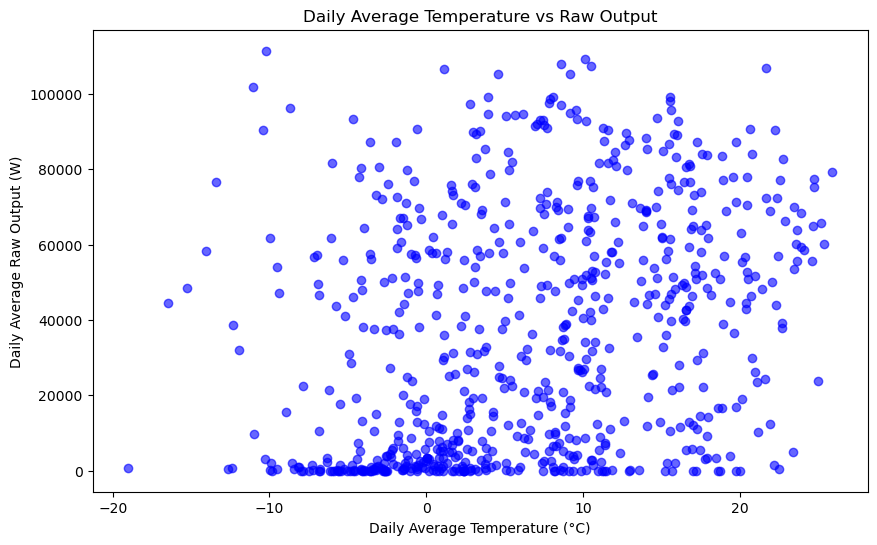

In [142]:
# Uurisime kas temperatuuri ja toorandmete vahel on seost, paistab et ei ole
# Ensure 'local_time' is a datetime index for resampling
pvt['local_time'] = pd.to_datetime(pvt['local_time'])

# Set 'local_time' as the index
pvt.set_index('local_time', inplace=True)

# Calculate daily average values for raw output and temperature
daily_avg = pvt[['raw', 'temperature']].resample('D').mean()

# Plot the daily average scatter plot for raw output vs temperature
plt.figure(figsize=(10, 6))
plt.scatter(daily_avg['temperature'], daily_avg['raw'], alpha=0.6, color='blue')
plt.title("Daily Average Temperature vs Raw Output")
plt.xlabel("Daily Average Temperature (°C)")
plt.ylabel("Daily Average Raw Output (W)")
plt.show()


In [84]:
# Katsetasime siin normaliseerimist

# 1. Min-Max Normalization to [0, 1]
pvt['raw_minmax_0_1'] = (pvt['raw'] - pvt['raw'].min()) / (pvt['raw'].max() - pvt['raw'].min())

# 2. Min-Max Normalization to [-1, 1]
pvt['raw_minmax_neg1_1'] = 2 * (pvt['raw'] - pvt['raw'].min()) / (pvt['raw'].max() - pvt['raw'].min()) - 1

# 3. Mean Normalization
pvt['raw_mean_normalized'] = (pvt['raw'] - pvt['raw'].mean()) / (pvt['raw'].max() - pvt['raw'].min())

# 4. Z-Score Normalization (Standardization)
pvt['raw_zscore'] = (pvt['raw'] - pvt['raw'].mean()) / pvt['raw'].std()

# Display summary of normalized data
normalized_summary = pvt[['raw_minmax_0_1', 'raw_minmax_neg1_1', 'raw_mean_normalized', 'raw_zscore']].describe()
normalized_summary


,raw_minmax_0_1,raw_minmax_neg1_1,raw_mean_normalized,raw_zscore
count,17016.000000,17016.000000,1.701600e+04,1.701600e+04
mean,0.122375,-0.755249,-1.252720e-17,8.017407e-17
std,0.221819,0.443639,2.218195e-01,1.000000e+00
min,0.000000,-1.000000,-1.223754e-01,-5.516892e-01
25%,0.000000,-1.000000,-1.223754e-01,-5.516892e-01
50%,0.000000,-1.000000,-1.223754e-01,-5.516892e-01
75%,0.126838,-0.746325,4.462156e-03,2.011616e-02
max,1.000000,1.000000,8.776246e-01,3.956481e+00


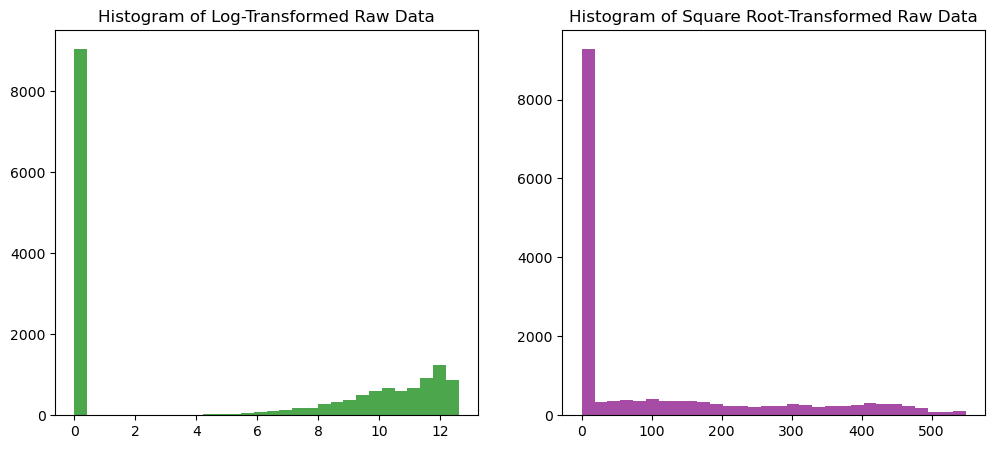

Shapiro-Wilk Test Results:
Log-Transformed Data: W=0.7275, p-value=0.0000
Square Root-Transformed Data: W=0.7354, p-value=0.0000


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [143]:
# Transformeerimine

import scipy.stats as stats

# Logaritmiline Transformation (1 oli lisatud, et ei tekiks log(0))
pvt['raw_log'] = np.log1p(pvt['raw'])

# Ruutjuur Transformeerimine
pvt['raw_sqrt'] = np.sqrt(pvt['raw'])

# Teeme histogramme transformeeritud andmetele, et neid võrrelda
plt.figure(figsize=(12, 5))

# Histogram logartimilise transformeerimisele
plt.subplot(1, 2, 1)
plt.hist(pvt['raw_log'], bins=30, color='green', alpha=0.7)
plt.title("Histogram of Log-Transformed Raw Data")

# Histogram ruutjuurelisele transformeerimisele
plt.subplot(1, 2, 2)
plt.hist(pvt['raw_sqrt'], bins=30, color='purple', alpha=0.7)
plt.title("Histogram of Square Root-Transformed Raw Data")

plt.show()

# Shapiro-Wilk test aitab hinnata transformeerimise normaliseerumist
log_shapiro = stats.shapiro(pvt['raw_log'])
sqrt_shapiro = stats.shapiro(pvt['raw_sqrt'])

print("Shapiro-Wilk Test Results:")
print(f"Log-Transformed Data: W={log_shapiro[0]:.4f}, p-value={log_shapiro[1]:.4f}")
print(f"Square Root-Transformed Data: W={sqrt_shapiro[0]:.4f}, p-value={sqrt_shapiro[1]:.4f}")


Descriptive Statistics for Square Root-Transformed Data:
count    17016.000000
mean       111.226012
std        156.659859
min          0.000000
25%          0.000000
50%          0.000000
75%        195.596559
max        549.208531
Name: raw_sqrt, dtype: float64


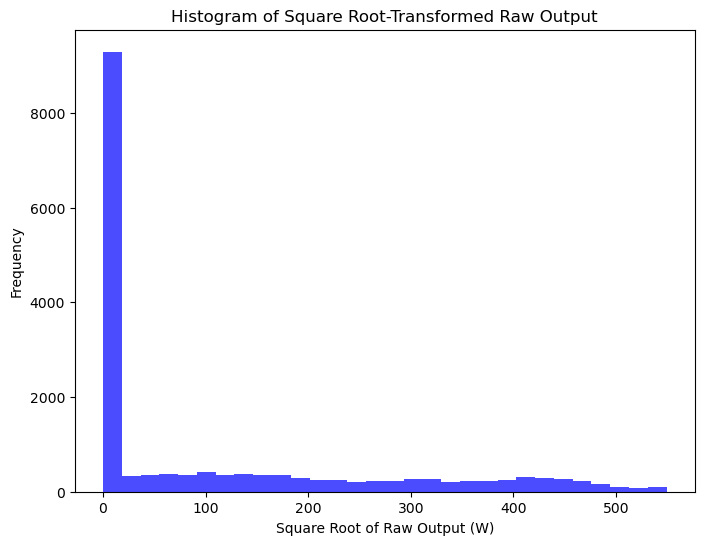

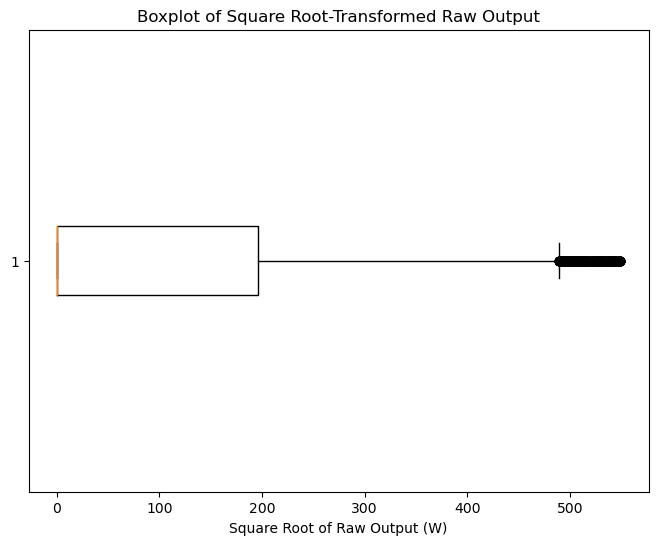

In [144]:
#Kasutame ruutjuurelist transformatsioon, sest see andis veidi paremaid tulemusi
# Samm 1: Statistika
sqrt_descriptive_stats = pvt['raw_sqrt'].describe()
print("Descriptive Statistics for Square Root-Transformed Data:")
print(sqrt_descriptive_stats)

# Samm 2: Visualiseerimine
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(pvt['raw_sqrt'], bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Square Root-Transformed Raw Output")
plt.xlabel("Square Root of Raw Output (W)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(pvt['raw_sqrt'], vert=False)
plt.title("Boxplot of Square Root-Transformed Raw Output")
plt.xlabel("Square Root of Raw Output (W)")
plt.show()


In [92]:
# ACD
# Samm 1: Arvutame trendi komponenti kasutades liikuvat keskmist
# For simplicity, assuming a weekly seasonality, we apply a 7-day moving average (if daily data)

# Calculate a centered 7-day moving average for the trend component
pvt['trend_acd'] = pvt['raw_sqrt'].rolling(window=7, center=True).mean()

# Step 2: Detrend the Data by subtracting the trend component from the original series
pvt['detrended_acd'] = pvt['raw_sqrt'] - pvt['trend_acd']

# Step 3: Estimate the Seasonal Component by averaging the detrended values for each hour of the day
# Using hour as the seasonal period (assuming hourly data to capture daily patterns)
hourly_seasonal_avg_acd = pvt.groupby('hour')['detrended_acd'].transform('mean')
pvt['seasonal_acd'] = hourly_seasonal_avg_acd

# Step 4: Calculate the Residual Component by removing trend and seasonal components from the original data
pvt['residual_acd'] = pvt['raw_sqrt'] - pvt['trend_acd'] - pvt['seasonal_acd']

# Display the first few rows to check the decomposition components
pvt[['raw_sqrt', 'trend_acd', 'seasonal_acd', 'residual_acd']].head(24)


,raw_sqrt,trend_acd,seasonal_acd,residual_acd
local_time,,,,
2021-02-02 02:00:00+02:00,0.0,NaN,-0.500754,NaN
2021-02-02 03:00:00+02:00,0.0,NaN,-3.682704,NaN
2021-02-02 04:00:00+02:00,0.0,NaN,-12.846098,NaN
2021-02-02 05:00:00+02:00,0.0,0.0,-27.811718,27.811718
2021-02-02 06:00:00+02:00,0.0,0.0,-36.795111,36.795111
2021-02-02 07:00:00+02:00,0.0,0.0,-30.522574,30.522574
2021-02-02 08:00:00+02:00,0.0,0.0,-4.511111,4.511111
2021-02-02 09:00:00+02:00,0.0,0.0,19.566145,-19.566145
2021-02-02 10:00:00+02:00,0.0,0.0,36.565514,-36.565514


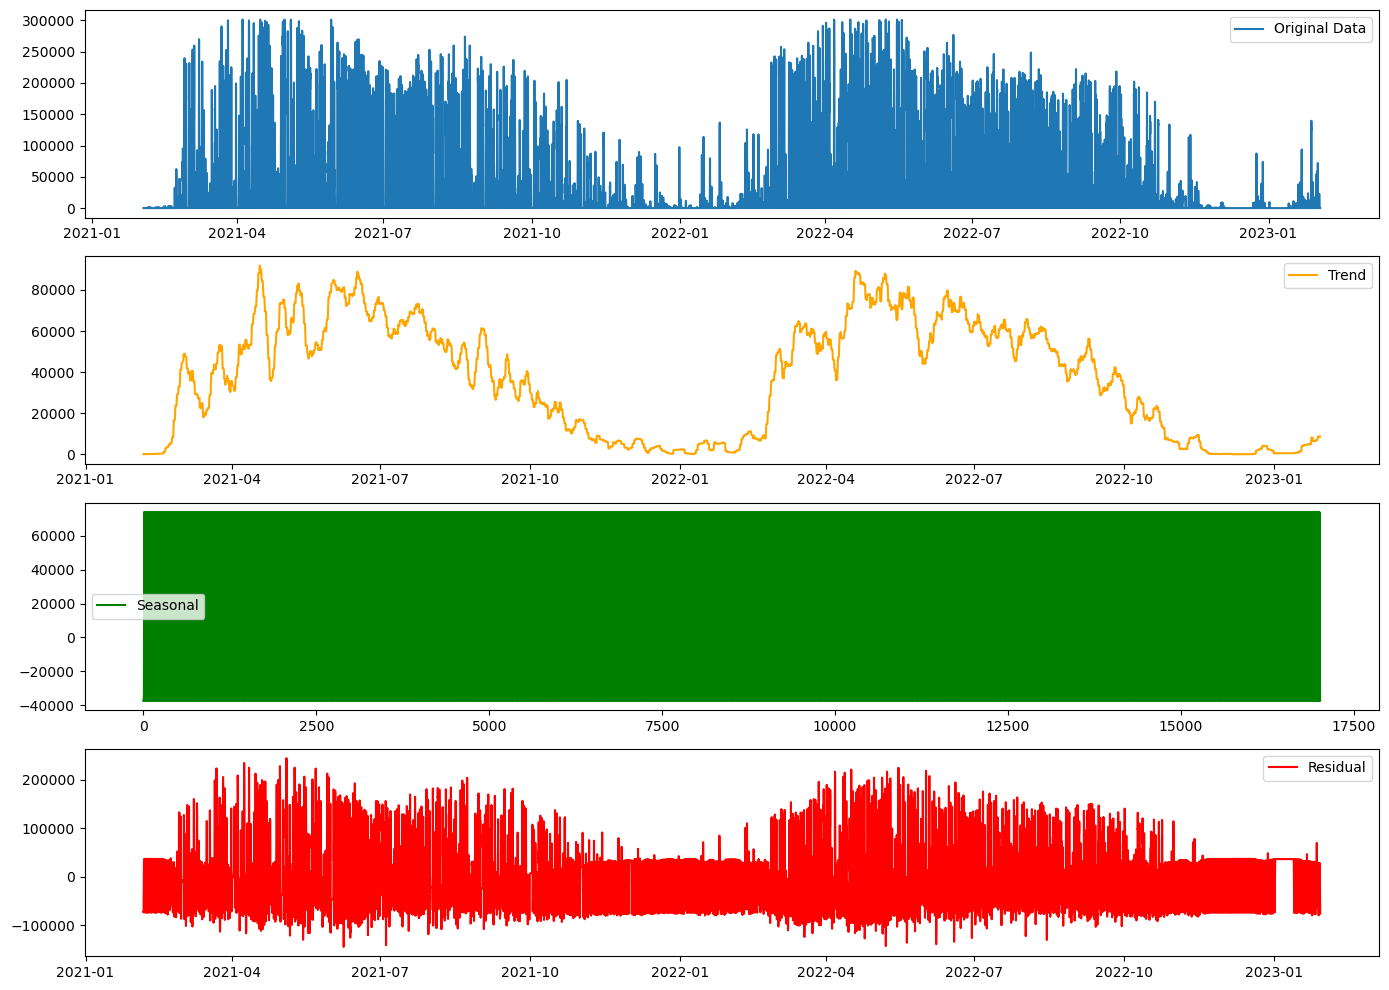

In [94]:
# Set the datetime column as the index for easier time-based operations
pvt.set_index('formatted_local_date', inplace=True)
pvt.index = pd.to_datetime(pvt.index)
raw_data = pvt['raw']
# Applying a moving average to estimate the trend component, using a 7-day window
trend = raw_data.rolling(window=7*24, center=True).mean()
# Detrending the data
detrended = raw_data - trend
# Reshape to capture seasonal patterns, assuming daily periodicity
seasonal = detrended.groupby(detrended.index.hour).mean()
# Residual = Raw data - Trend - Seasonal (repeating seasonal pattern over the entire period)
seasonal_repeated = np.tile(seasonal, len(raw_data) // len(seasonal) + 1)[:len(raw_data)]
residual = raw_data - trend - seasonal_repeated
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(raw_data, label='Original Data')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal_repeated, label='Seasonal', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.legend()

plt.tight_layout()
plt.show()


In [101]:
# Ensure 'local_time' column is available in the DataFrame
if 'local_time' not in pvt.columns:
    # Recreate 'local_time' column from 'timestamp'
    from zoneinfo import ZoneInfo
    pvt['utc_date'] = pd.to_datetime(pvt['timestamp'], unit='ms', utc=True)
    pvt['local_time'] = pvt['utc_date'].dt.tz_convert(ZoneInfo('Europe/Tallinn'))


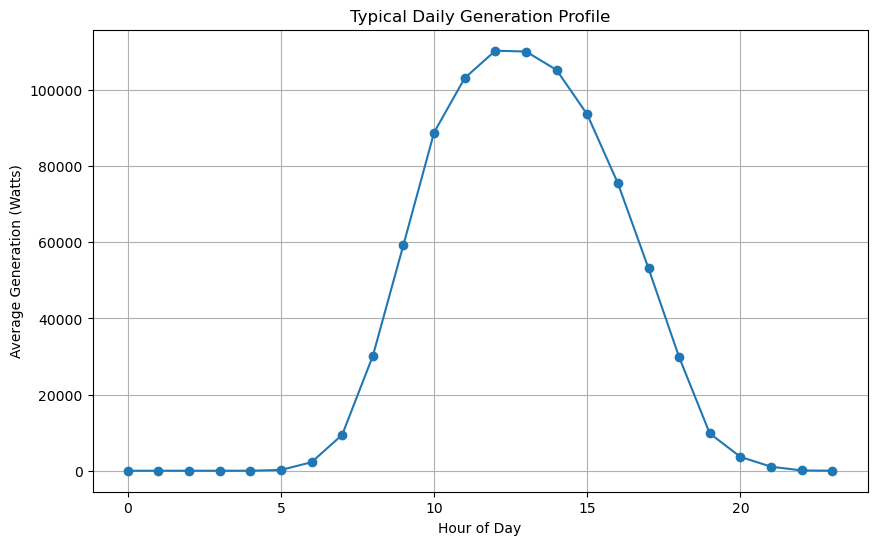

In [102]:
# Create a 'hour' column for grouping
pvt['hour'] = pvt['local_time'].dt.hour

# Calculate the average generation per hour
daily_profile = pvt.groupby('hour')['raw'].mean()

# Plot the typical daily generation profile
plt.figure(figsize=(10, 6))
plt.plot(daily_profile, marker='o')
plt.title('Typical Daily Generation Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Average Generation (Watts)')
plt.grid()
plt.show()


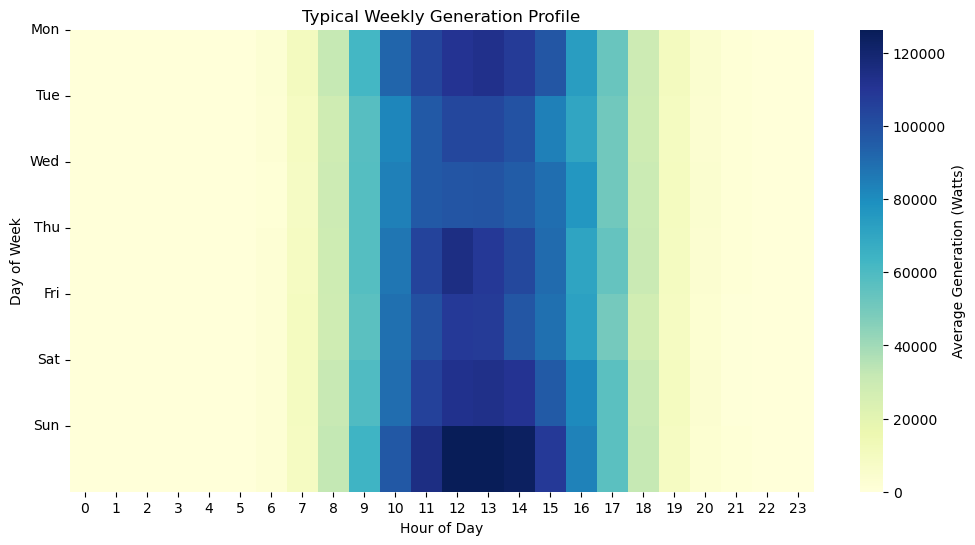

In [103]:
# Create 'day_of_week' and 'hour' columns for grouping
pvt['day_of_week'] = pvt['local_time'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate the average generation for each day of the week and hour
weekly_profile = pvt.groupby(['day_of_week', 'hour'])['raw'].mean().unstack()

# Plot the typical weekly generation profile as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(weekly_profile, cmap="YlGnBu", cbar_kws={'label': 'Average Generation (Watts)'})
plt.title('Typical Weekly Generation Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


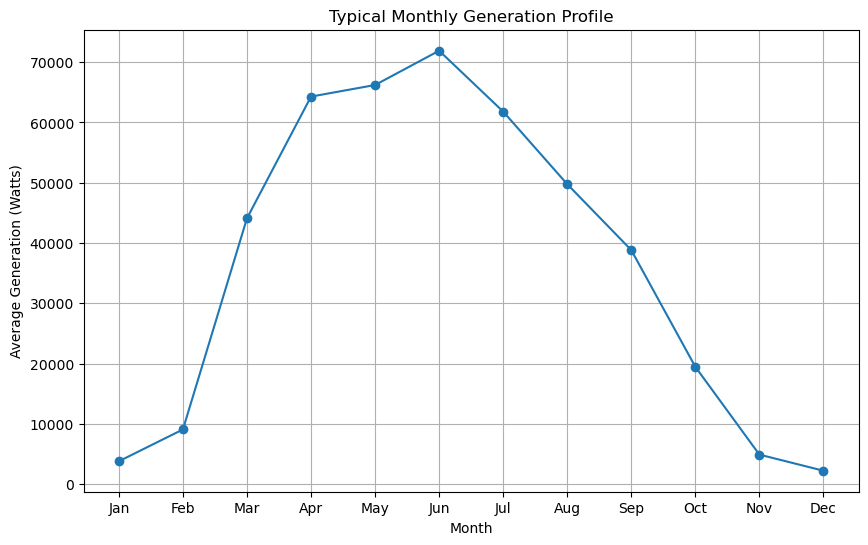

In [104]:
# Create a 'month' column for grouping
pvt['month'] = pvt['local_time'].dt.month

# Calculate the average generation for each month
monthly_profile = pvt.groupby('month')['raw'].mean()

# Plot the typical monthly generation profile
plt.figure(figsize=(10, 6))
plt.plot(monthly_profile, marker='o')
plt.title('Typical Monthly Generation Profile')
plt.xlabel('Month')
plt.ylabel('Average Generation (Watts)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


Edasi on mõned katsetused ja lisagraafikud, mida tegime läbi

In [30]:
import numpy as np

# Step 1: Create a new column "is_missing_modified2" in the original dataset, where missing = 1 and not missing = 0
pvt['is_missing_modified2'] = np.where(pvt['modified2'].isnull(), 1, 0)

# Step 2: Filter the dataset to only include hours between 9 and 17
filtered_data = pvt[(pvt['hour'] >= 9) & (pvt['hour'] <= 17)]['is_missing_modified2'].to_numpy()

# Step 3: Calculate distances between consecutive missing values in the filtered "is_missing_modified2" array
distances = []
last_missing_index = None

# Loop to calculate distance between missing values
for i, value in enumerate(filtered_data):
    if value == 1:
        if last_missing_index is not None:
            distances.append(i - last_missing_index - 1)  # Calculate distance between current and last missing
        last_missing_index = i  # Update last missing index

# Print the resulting array of distances
print("Distances between consecutive missing values in modified2 (9 AM - 5 PM):", distances)

Distances between consecutive missing values in modified2 (9 AM - 5 PM): [6, 7, 0, 26, 9, 8, 27, 6, 0, 0, 15, 0, 7, 0, 7, 0, 15, 0, 8, 8, 0, 7, 7, 0, 9, 8, 0, 7, 0, 6, 0, 6, 9, 0, 0, 8, 3, 9, 0, 11, 5, 0, 8, 0, 0, 6, 0, 7, 8, 7, 8, 0, 0, 0, 0, 5, 10, 6, 10, 4, 0, 7, 0, 8, 0, 0, 0, 8, 3, 0, 10, 8, 0, 5, 0, 11, 0, 3, 1, 1, 6, 1, 6, 6, 10, 8, 0, 0, 0, 7, 9, 0, 5, 6, 0, 0, 0, 0, 4, 10, 2, 3, 0, 0, 7, 12, 7, 4, 0, 0, 0, 0, 5, 0, 7, 0, 0, 5, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 5, 0, 9, 7, 6, 0, 0, 0, 8, 0, 2, 5, 0, 4, 4, 3, 9, 1, 5, 0, 0, 0, 0, 7, 0, 4, 3, 4, 0, 0, 0, 0, 9, 3, 9, 0, 2, 6, 5, 0, 0, 0, 8, 0, 6, 0, 0, 4, 0, 0, 0, 7, 1, 3, 0, 7, 2, 5, 1, 0, 0, 0, 6, 7, 11, 3, 8, 2, 5, 0, 10, 1, 3, 4, 5, 0, 11, 7, 0, 0, 3, 0, 7, 0, 0, 0, 4, 0, 0, 0, 0, 3, 9, 0, 0, 0, 4, 0, 0, 0, 0, 4, 9, 0, 7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 7, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 8, 11, 0, 4, 0, 0, 0, 5, 0, 7, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 1, 4, 0, 0, 6, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 3, 6, 6

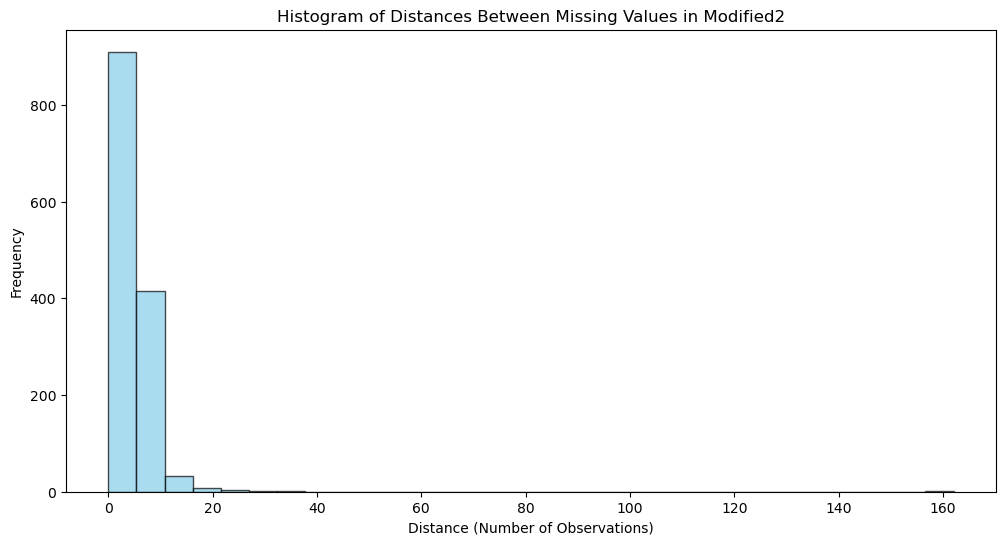

In [36]:
import matplotlib.pyplot as plt

# Plot a histogram of the distances between missing values in modified2
plt.figure(figsize=(12, 6))
plt.hist(distances, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Distances Between Missing Values in Modified2')
plt.xlabel('Distance (Number of Observations)')
plt.ylabel('Frequency')
plt.show()


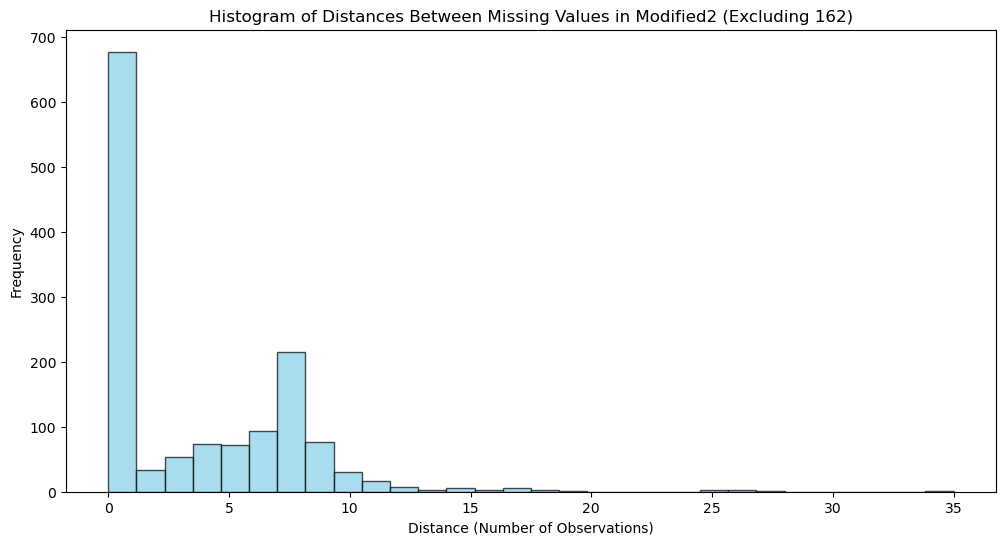

In [37]:
import matplotlib.pyplot as plt

# Filter out the distance value of 162
filtered_distances = [d for d in distances if d != 162]

# Plot a histogram of the filtered distances between missing values in modified2
plt.figure(figsize=(12, 6))
plt.hist(filtered_distances, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Distances Between Missing Values in Modified2 (Excluding 162)')
plt.xlabel('Distance (Number of Observations)')
plt.ylabel('Frequency')
plt.show()


In [38]:
import numpy as np

# Step 1: Create a new column "is_missing_modified2" if not already done, where missing = 1 and not missing = 0
pvt['is_missing_modified2'] = np.where(pvt['modified2'].isnull(), 1, 0)

# Step 2: Extract only the "is_missing_modified2" column for the full 24-hour period and convert to a numpy array
full_day_data = pvt['is_missing_modified2'].to_numpy()

# Step 3: Calculate distances between consecutive missing values in the full 24-hour "is_missing_modified2" array
distances_full_day = []
last_missing_index = None

# Loop to calculate distance between missing values for the entire 24-hour period
for i, value in enumerate(full_day_data):
    if value == 1:
        if last_missing_index is not None:
            distances_full_day.append(i - last_missing_index - 1)  # Calculate distance between current and last missing
        last_missing_index = i  # Update last missing index

# Print the resulting array of distances
print("Distances between consecutive missing values in modified2 (Full 24-hour period):", distances_full_day)


Distances between consecutive missing values in modified2 (Full 24-hour period): [21, 22, 0, 71, 24, 23, 72, 21, 0, 0, 45, 0, 22, 0, 22, 0, 45, 0, 23, 23, 0, 22, 22, 0, 24, 23, 0, 22, 0, 21, 0, 21, 24, 0, 0, 23, 18, 24, 0, 26, 20, 0, 23, 0, 0, 21, 0, 22, 23, 22, 23, 0, 0, 0, 0, 20, 25, 21, 25, 19, 0, 22, 0, 23, 0, 0, 0, 23, 18, 0, 25, 23, 0, 20, 0, 25, 0, 18, 1, 1, 21, 1, 21, 21, 25, 23, 0, 0, 0, 22, 24, 0, 20, 21, 0, 0, 0, 0, 19, 25, 2, 18, 0, 0, 22, 27, 22, 19, 0, 0, 0, 0, 20, 0, 22, 0, 0, 20, 0, 0, 0, 0, 19, 0, 0, 0, 0, 19, 0, 0, 0, 20, 0, 24, 22, 21, 0, 0, 0, 23, 0, 2, 20, 0, 19, 4, 18, 24, 1, 20, 0, 0, 0, 0, 22, 0, 19, 3, 19, 0, 0, 0, 0, 24, 18, 24, 0, 2, 21, 20, 0, 0, 0, 23, 0, 21, 0, 0, 19, 0, 0, 0, 22, 1, 18, 0, 22, 2, 20, 1, 0, 0, 0, 21, 22, 26, 18, 23, 2, 20, 0, 25, 1, 18, 4, 20, 0, 26, 22, 0, 0, 18, 0, 22, 0, 0, 0, 19, 0, 0, 0, 0, 18, 24, 0, 0, 0, 19, 0, 0, 0, 0, 19, 24, 0, 22, 0, 0, 0, 0, 19, 0, 0, 0, 0, 18, 0, 22, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 19, 0, 23, 26, 0, 19, 0, 0, 

#### Task 3: Data cleaning
##### Time formatting

##### Missing data mechanism visualization

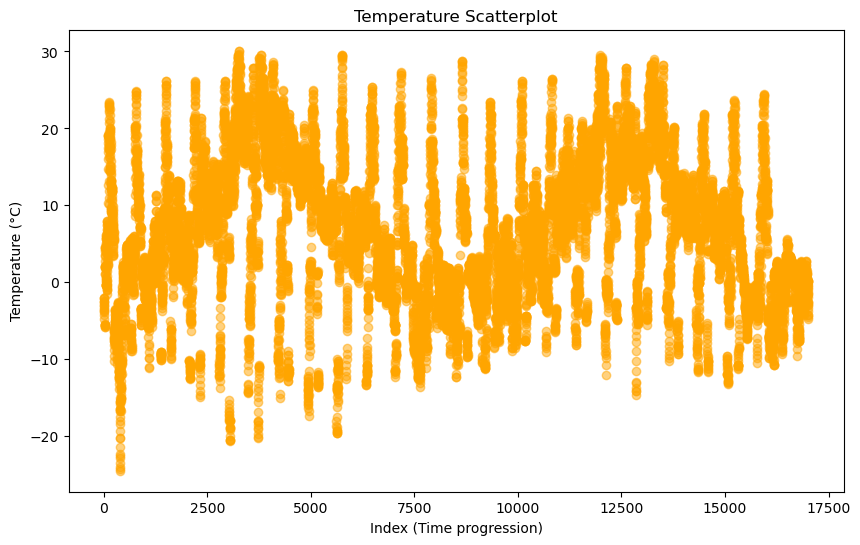

In [5]:
import matplotlib.pyplot as plt

# Scatterplot of the temperature data
plt.figure(figsize=(10, 6))
plt.scatter(pvt.index, pvt['temperature'], alpha=0.5, color='orange')
plt.title('Temperature Scatterplot')
plt.xlabel('Index (Time progression)')
plt.ylabel('Temperature (°C)')
plt.show()


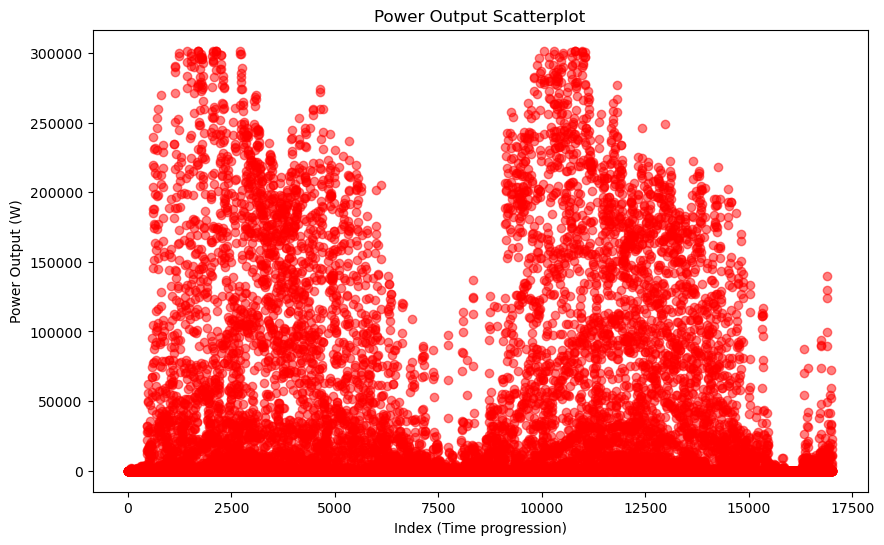

In [9]:
# Scatterplot of the power output data
plt.figure(figsize=(10, 6))
plt.scatter(pvt.index, pvt['raw'], alpha=0.5, color='red')
plt.title('Power Output Scatterplot')
plt.xlabel('Index (Time progression)')
plt.ylabel('Power Output (W)')
plt.show()

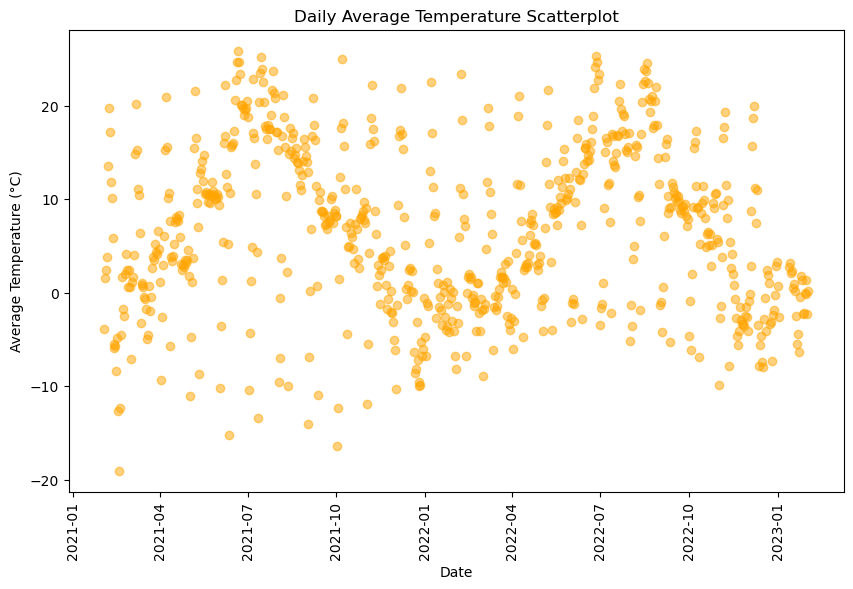

In [6]:
# Calculate daily average temperature
pvt['date'] = pvt['local_time'].dt.date
daily_avg_temp = pvt.groupby('date')['temperature'].mean().reset_index()

# Create scatterplot of daily average temperature
plt.figure(figsize=(10, 6))
plt.scatter(daily_avg_temp['date'], daily_avg_temp['temperature'], alpha=0.5, color='orange')
plt.title('Daily Average Temperature Scatterplot')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.show()

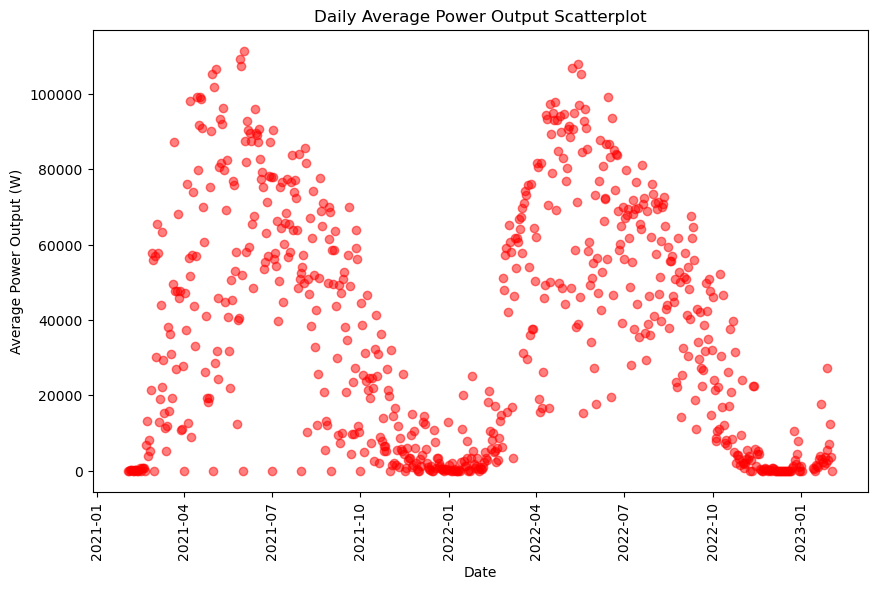

In [8]:
# Calculate daily average power
pvt['date'] = pvt['local_time'].dt.date
daily_avg_power = pvt.groupby('date')['raw'].mean().reset_index()

# Create scatterplot of daily average temperature
plt.figure(figsize=(10, 6))
plt.scatter(daily_avg_temp['date'], daily_avg_power['raw'], alpha=0.5, color='red')
plt.title('Daily Average Power Output Scatterplot')
plt.xlabel('Date')
plt.ylabel('Average Power Output (W)')
plt.xticks(rotation=90)
plt.show()